真实参数: [10, 3, 6]
拟合参数 [-10.10352478   2.9940724    2.93007138]


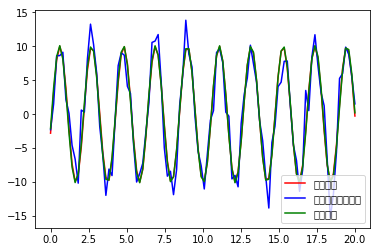

In [15]:
#最小二乘拟合实例
import numpy as np
from scipy.optimize import leastsq
import pylab as pl

def func(x, p):
    """
    数据拟合所用的函数: A*cos(2*pi*k*x + theta)
    """
    A, k, theta = p
    return A*np.sin(k*x+theta)   

def residuals(p, y, x):
    """
    实验数据x, y和拟合函数之间的差，p为拟合需要找到的系数
    """
    return y - func(x, p)

x = np.linspace(0, 20, 100)
A, k, theta = 10, 3, 6 # 真实数据的函数参数
y0 = func(x, [A, k, theta]) # 真实数据
y1 = y0 + 2 * np.random.randn(len(x)) # 加入噪声之后的实验数据    

p0 = [3, 3, 3] # 第一次猜测的函数拟合参数

# 调用leastsq进行数据拟合
# residuals为计算误差的函数
# p0为拟合参数的初始值
# args为需要拟合的实验数据
plsq = leastsq(residuals, p0, args=(y1, x))

print (u"真实参数:", [A, k, theta] )
print (u"拟合参数", plsq[0]) # 实验数据拟合后的参数

pl.plot(x, y0, color='r',label=u"真实数据")
pl.plot(x, y1, color='b',label=u"带噪声的实验数据")
pl.plot(x, func(x, plsq[0]), color='g', label=u"拟合数据")
pl.legend()
pl.show()

pi is 3.03125
elaspe is 884.420709s


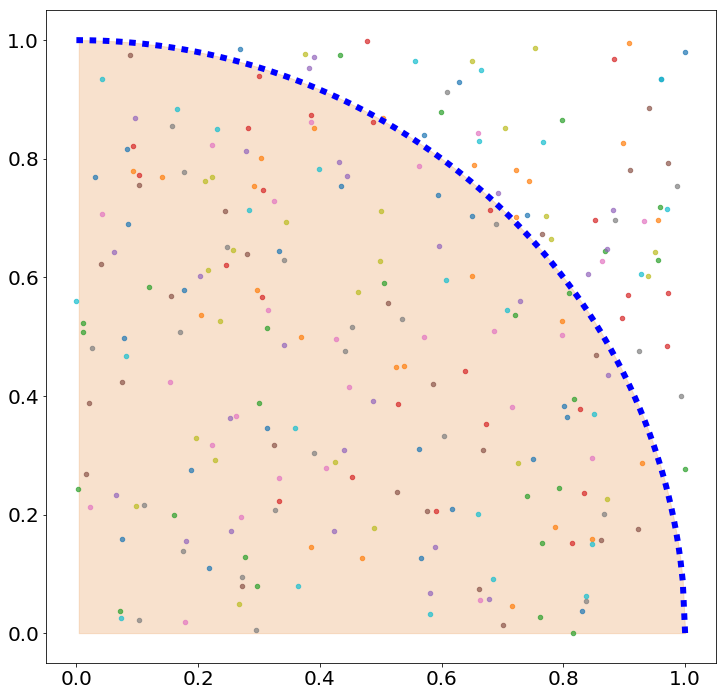

In [20]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 15 11:18:01 2017

@author: Dell
"""

from random import random# pi based on python MCMC

from time import clock
from matplotlib import pyplot as plt
import numpy as np
plt.figure(figsize=(12,12))
X = np.linspace(0, 1, 256,endpoint=True)
C = np.sqrt(1-X**2)
plt.plot(X, C, color="b", linewidth=6, linestyle=":", label="e^(-(2x)^2)")
#ax = plt.gca()
plt.fill_between(X,C,where=(X>0),color='#EFB582' , alpha=0.4)
#填充颜色
n=2**8# a little slow; set it smaller
hist=0
clock()
for i in range(1,n):
    x,y=random(),random()
    dist=np.sqrt(x**2+y**2)
    plt.scatter(x,y, s=20, alpha=0.7, marker='o')
    if dist<=1.0:
        hist=hist+1
pi=4*(hist/n)
print('pi is %s'%pi)
print('elaspe is %ss'%clock())


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#刻度字体大小

plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)

plt.show()